# **Project M2: Early Analysis & Insights**
Author: Grace (Wen-Hsin) Kung

Date: 2026/02/07

## **Data preveiw & cleaning**

In [22]:
# Import data
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data = pd.read_csv('drugs.csv')
data.head()

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,species,first_published,revision_date,url
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,Takeda Pharma A/S,Antineoplastic agents,2012-07-19,2022-11-17,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,NaN,2018-07-25T13:58:00Z,2023-03-13T11:52:00Z,https://www.ema.europa.eu/en/medicines/human/E...
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,Cycle Pharmaceuticals (Europe) Ltd,"Other alimentary tract and metabolism products,",2018-05-31,2023-03-10,4.0,Treatment of adult and paediatric patients wit...,NaN,2018-07-26T14:20:00Z,2023-03-10T17:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
2,human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,4577,False,authorised,NaN,True,...,Pierre Fabre Medicament,NaN,2022-10-13,2023-03-09,2.0,Ebvallo is indicated as monotherapy for treatm...,NaN,2022-10-12T16:13:00Z,2023-03-10T13:40:00Z,https://www.ema.europa.eu/en/medicines/human/E...
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,...,Roche Registration GmbH,"Immune sera and immunoglobulins,",2021-11-11,2023-02-24,3.0,Ronapreve is indicated for:Treatment of COVID-...,NaN,2021-11-12T16:30:00Z,2023-03-10T12:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,secukinumab,3729,False,authorised,L04AC10,False,...,Novartis Europharm Limited,Immunosuppressants,2014-11-20,2023-01-26,30.0,Plaque psoriasisCosentyx is indicated for the ...,NaN,2018-06-07T11:59:00Z,2023-03-09T18:53:00Z,https://www.ema.europa.eu/en/medicines/human/E...


In [23]:
# Split into human and veterinary data
data_human = data[data['category'] == 'human']
data_vet = data[data['category'] == 'veterinary']
print(data_human.shape)
print(data_vet.shape)

(1706, 28)
(282, 28)


In [24]:
# Check for missing values
data_human.isnull().sum()

category                                          0
medicine_name                                     0
therapeutic_area                                  3
common_name                                       2
active_substance                                  1
product_number                                    0
patient_safety                                    0
authorisation_status                              1
atc_code                                         25
additional_monitoring                             0
generic                                           0
biosimilar                                        0
conditional_approval                              0
exceptional_circumstances                         0
accelerated_assessment                            0
orphan_medicine                                   0
marketing_authorisation_date                     56
date_of_refusal_of_marketing_authorisation     1635
marketing_authorisation_holder_company_name       4
pharmacother

In [25]:
# Clean data_human
exclude_cols = ['species', 'date_of_refusal_of_marketing_authorisation', 'marketing_authorisation_date', 'atc_code']
cols_to_check = [col for col in data_human.columns if col not in exclude_cols]
data_human = data_human.dropna(subset=cols_to_check)

In [26]:
# Drop "species" column
data_human = data_human.drop('species', axis=1)

# Check for missing values again
data_human.isnull().sum()

category                                         0
medicine_name                                    0
therapeutic_area                                 0
common_name                                      0
active_substance                                 0
product_number                                   0
patient_safety                                   0
authorisation_status                             0
atc_code                                         6
additional_monitoring                            0
generic                                          0
biosimilar                                       0
conditional_approval                             0
exceptional_circumstances                        0
accelerated_assessment                           0
orphan_medicine                                  0
marketing_authorisation_date                    24
date_of_refusal_of_marketing_authorisation     937
marketing_authorisation_holder_company_name      0
pharmacotherapeutic_group      

In [27]:
# Check for unique values
data_human.nunique()

category                                         1
medicine_name                                  966
therapeutic_area                               453
common_name                                    679
active_substance                               715
product_number                                 969
patient_safety                                   2
authorisation_status                             3
atc_code                                       595
additional_monitoring                            2
generic                                          2
biosimilar                                       2
conditional_approval                             2
exceptional_circumstances                        2
accelerated_assessment                           2
orphan_medicine                                  2
marketing_authorisation_date                   593
date_of_refusal_of_marketing_authorisation      29
marketing_authorisation_holder_company_name    344
pharmacotherapeutic_group      

In [28]:
# One-hot encode "therapeutic_area"
# Convert to list of cleaned area strings per row (handle NaN)
ta = data_human['therapeutic_area'].fillna('').astype(str).str.split(';').apply(lambda lst: [s.strip() for s in lst if s.strip()])

# Explode and get dummies
ta_exploded = ta.explode()
if not ta_exploded.dropna().empty:
    ta_dummies = pd.get_dummies(ta_exploded).groupby(level=0).max()
    ta_dummies.columns = ['thera_' + col for col in ta_dummies.columns]
    # Remove any existing thera_ columns to avoid duplication
    existing_thera = [c for c in data_human.columns if c.startswith('thera_')]
    data_human = data_human.drop(columns=existing_thera, errors='ignore')
    # Concatenate new one-hot columns
    data_human = pd.concat([data_human, ta_dummies], axis=1)
else:
    # If there are no therapeutic areas, ensure no leftover thera_ columns remain
    data_human = data_human.drop(columns=[c for c in data_human.columns if c.startswith('thera_')], errors='ignore')

# Quick check
data_human.head()

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,thera_Waldenstrom Macroglobulinemia,thera_Wegener Granulomatosis,thera_Wet Macular Degeneration,thera_Whooping Cough,thera_Wound Healing,thera_Wounds and Injuries,"thera_Xanthomatosis, Cerebrotendinous",thera_alpha-Mannosidosis,thera_beta-Thalassemia,thera_von Willebrand Diseases
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,False,False,False,False,False,False,False,False,False,False
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,False,False,False,False,False,False,False,False,False,False
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,...,False,False,False,False,False,False,False,False,False,False
4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,secukinumab,3729,False,authorised,L04AC10,False,...,False,False,False,False,False,False,False,False,False,False
5,human,Caprelsa,Thyroid Neoplasms,vandetanib,vandetanib,2315,False,authorised,L01XE,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# One-hot encode "active_substance"
sub = data_human['active_substance'].fillna('').astype(str).str.split(';').apply(lambda lst: [s.strip() for s in lst if s.strip()])
sub_exploded = sub.explode()
if not sub_exploded.dropna().empty:
    sub_dummies = pd.get_dummies(sub_exploded).groupby(level=0).max()
    sub_dummies.columns = ['sub_' + col for col in sub_dummies.columns]
    # Remove any existing sub_ columns to avoid duplication
    existing_sub = [c for c in data_human.columns if c.startswith('sub_')]
    data_human = data_human.drop(columns=existing_sub, errors='ignore')
    # Concatenate new one-hot columns
    data_human = pd.concat([data_human, sub_dummies], axis=1)
else:
    # If there are no therapeutic areas, ensure no leftover thera_ columns remain
    data_human = data_human.drop(columns=[c for c in data_human.columns if c.startswith('thera_')], errors='ignore')

# Quick check
data_human.head()

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,sub_voxelotor,sub_vutrisiran sodium,sub_yttrium (90y) chloride,sub_zanamivir,sub_zanubrutinib,sub_ziconotide,sub_zoledronic acid,sub_zoledronic acid monohydrate,"sub_zoledronic acid, zoledronic acid monohydrate",sub_zonisamide
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,False,False,False,False,False,False,False,False,False,False
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,False,False,False,False,False,False,False,False,False,False
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,...,False,False,False,False,False,False,False,False,False,False
4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,secukinumab,3729,False,authorised,L04AC10,False,...,False,False,False,False,False,False,False,False,False,False
5,human,Caprelsa,Thyroid Neoplasms,vandetanib,vandetanib,2315,False,authorised,L01XE,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Add "decision_time" column
data_human['decision_time_days'] = (
    pd.to_datetime(data_human['decision_date'], errors='coerce') -
    pd.to_datetime(data_human['date_of_opinion'], errors='coerce')
).dt.days

data_human.head(3)

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,sub_vutrisiran sodium,sub_yttrium (90y) chloride,sub_zanamivir,sub_zanubrutinib,sub_ziconotide,sub_zoledronic acid,sub_zoledronic acid monohydrate,"sub_zoledronic acid, zoledronic acid monohydrate",sub_zonisamide,decision_time_days
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,False,False,False,False,False,False,False,False,False,3773
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,False,False,False,False,False,False,False,False,False,1744
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,...,False,False,False,False,False,False,False,False,False,470


### **Distribution of therapeutic_area & active_substance**

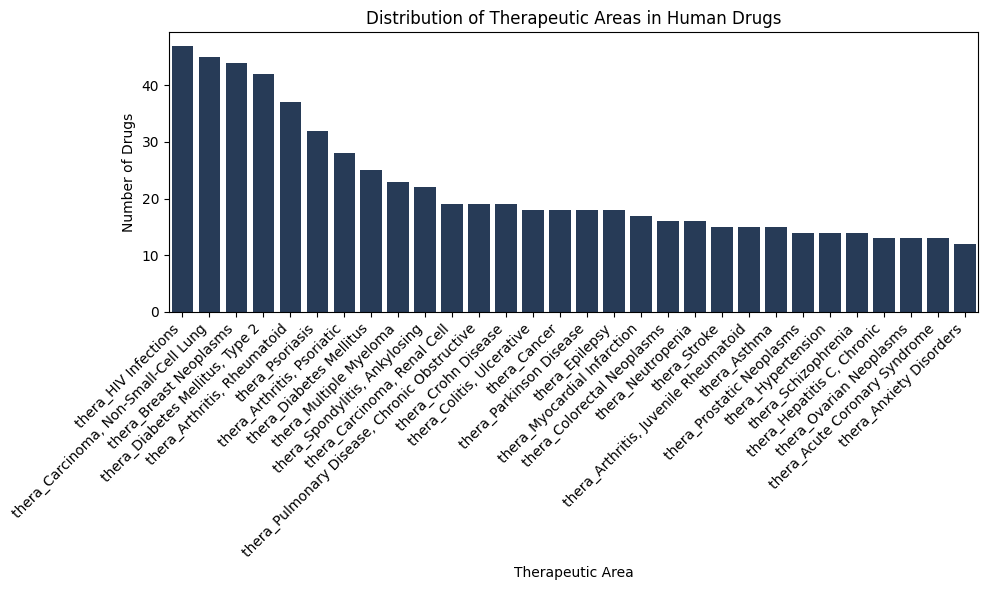

In [31]:
# therapeutic_area bar chart
import matplotlib.pyplot as plt
import seaborn as sns

thera_cols = [col for col in data_human.columns if col.startswith('thera_')]
thera_counts = data_human[thera_cols].sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x=thera_counts.index, y=thera_counts.values, color="#1f3a5f", edgecolor='none')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Therapeutic Area')
plt.ylabel('Number of Drugs')
plt.title('Distribution of Therapeutic Areas in Human Drugs')
plt.tight_layout()
plt.show()

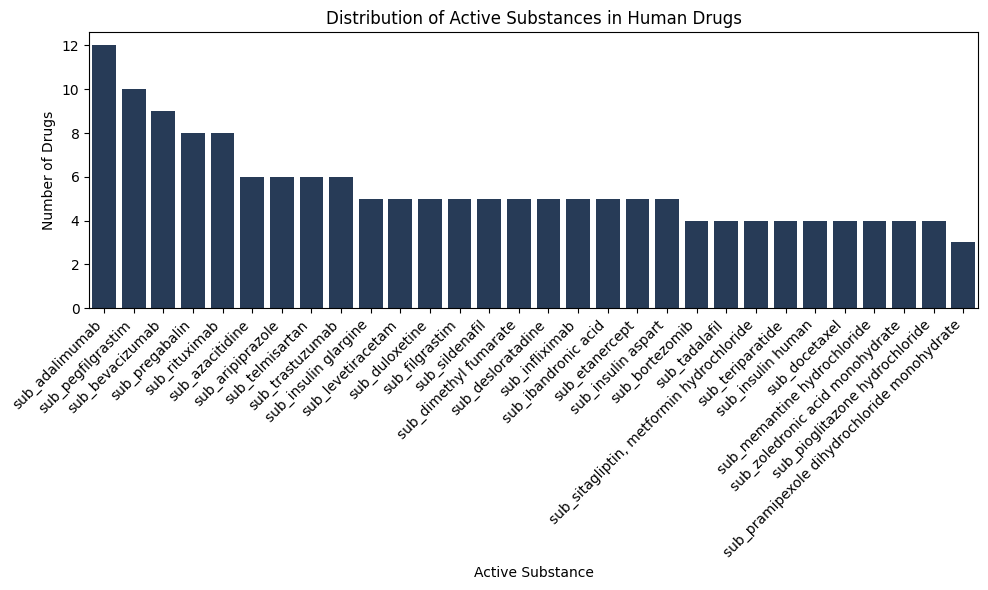

In [32]:
# active_substance bar chart
import matplotlib.pyplot as plt
import seaborn as sns

sub_cols = [col for col in data_human.columns if col.startswith('sub_')]
sub_counts = data_human[sub_cols].sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x=sub_counts.index, y=sub_counts.values, color="#1f3a5f", edgecolor='none')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Active Substance')
plt.ylabel('Number of Drugs')
plt.title('Distribution of Active Substances in Human Drugs')
plt.tight_layout()
plt.show()

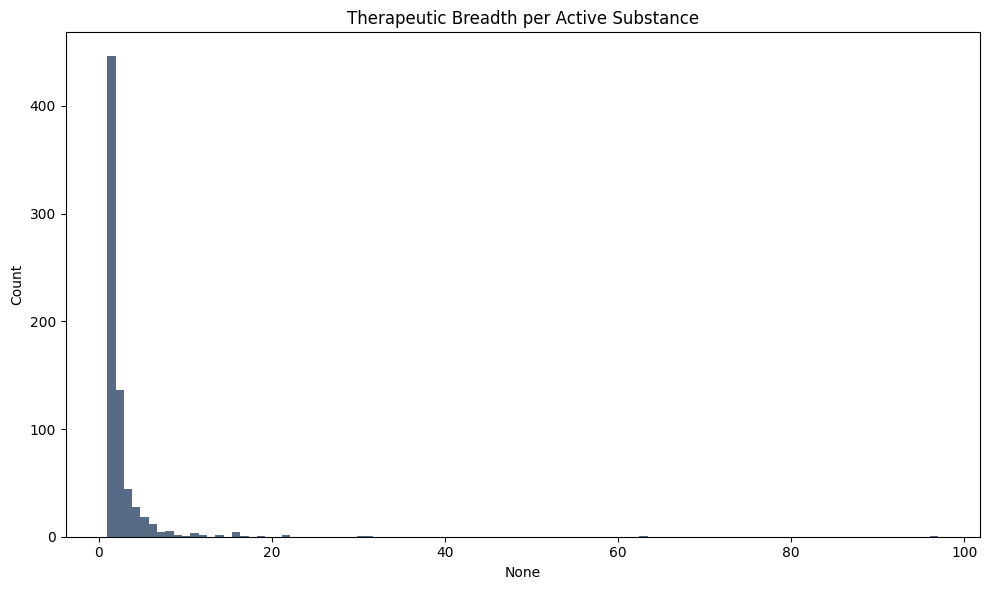

In [33]:
# active_substance therapeutic area count

substance_thera_count = data_human.groupby('active_substance')[thera_cols].sum().sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(x=substance_thera_count, bins=100, color="#1f3a5f", edgecolor='none')
plt.title('Therapeutic Breadth per Active Substance')
plt.tight_layout()
plt.show()

### **Check Columns**

In [34]:
data_human.columns.tolist()

['category',
 'medicine_name',
 'therapeutic_area',
 'common_name',
 'active_substance',
 'product_number',
 'patient_safety',
 'authorisation_status',
 'atc_code',
 'additional_monitoring',
 'generic',
 'biosimilar',
 'conditional_approval',
 'exceptional_circumstances',
 'accelerated_assessment',
 'orphan_medicine',
 'marketing_authorisation_date',
 'date_of_refusal_of_marketing_authorisation',
 'marketing_authorisation_holder_company_name',
 'pharmacotherapeutic_group',
 'date_of_opinion',
 'decision_date',
 'revision_number',
 'condition_indication',
 'first_published',
 'revision_date',
 'url',
 'thera_Abdominal Neoplasms',
 'thera_Achondroplasia',
 'thera_Acidosis, Renal Tubular',
 'thera_Acromegaly',
 'thera_Acute Coronary Syndrome',
 'thera_Acute Pain',
 'thera_Adenocarcinoma',
 'thera_Adrenal Hyperplasia, Congenital',
 'thera_Adrenal Insufficiency',
 'thera_Alzheimer Disease',
 'thera_Amino Acid Metabolism, Inborn Errors',
 'thera_Amyloid Neuropathies, Familial',
 'thera_Amylo

## **Decision Duration & Features**

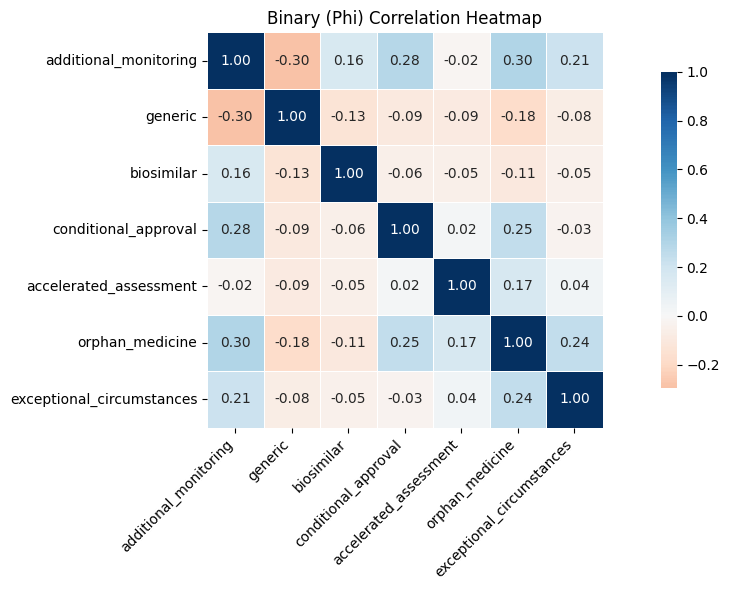

In [35]:
# Binary features correlation heatmap
from scipy.stats import chi2_contingency

binary_vars = ['additional_monitoring','generic','biosimilar','conditional_approval', 'accelerated_assessment', 'orphan_medicine', 'exceptional_circumstances']
data_binary = data_human[binary_vars].apply(pd.to_numeric, errors='coerce').dropna()

# Phi correlation matrix
phi_corr = data_binary.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(phi_corr, annot=True, fmt='.2f', cmap="RdBu",center=0, square=True,
            cbar_kws={'shrink': 0.8}, linewidths=0.5)
plt.title('Binary (Phi) Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

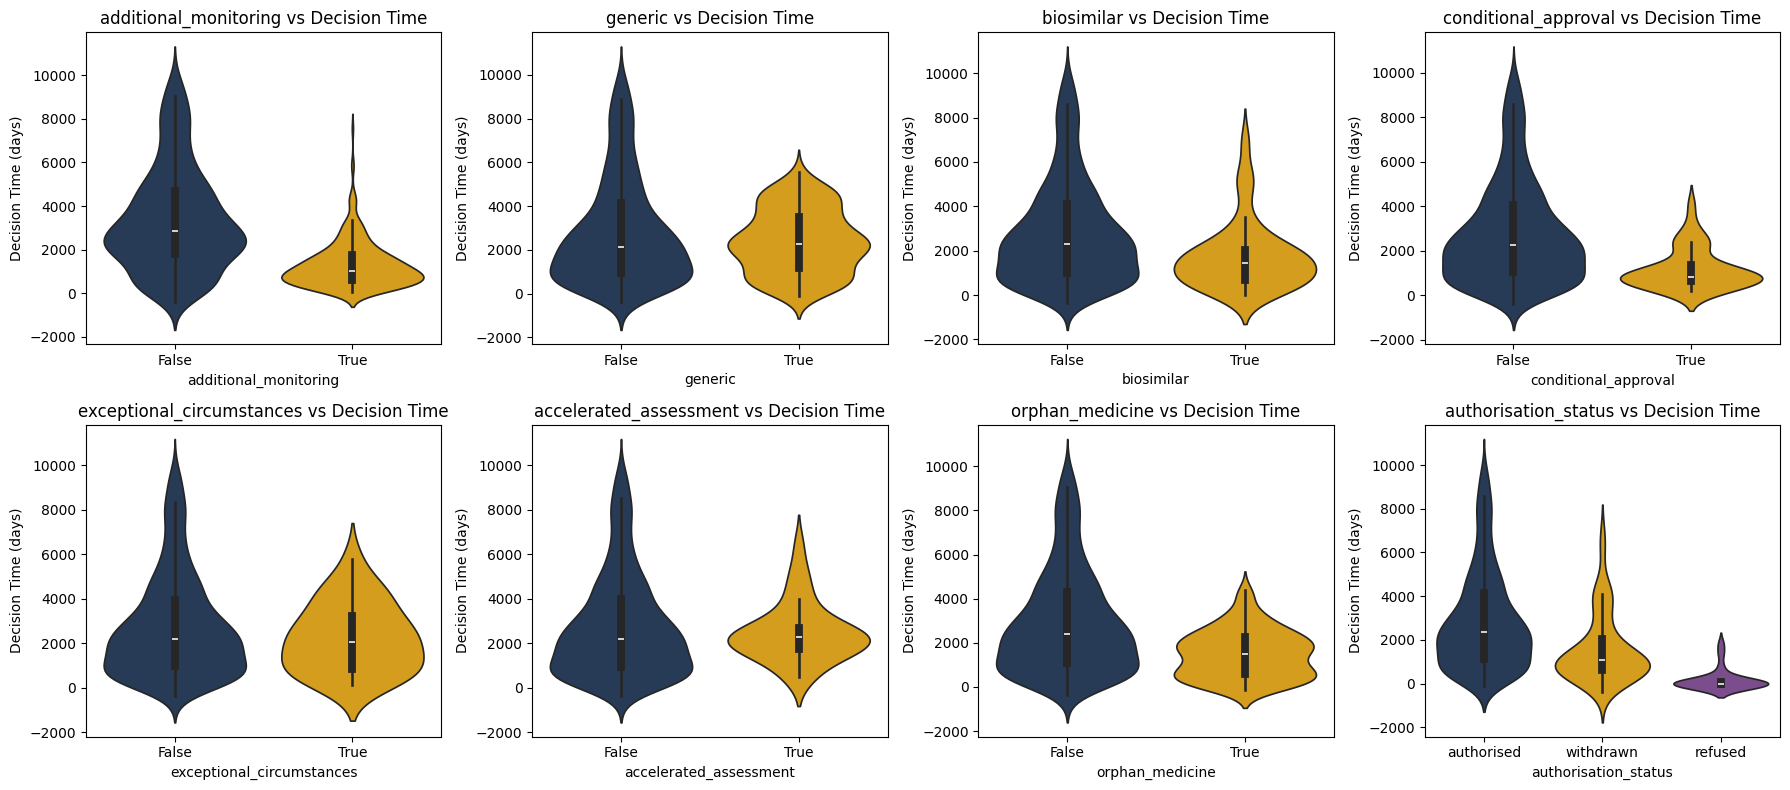

In [36]:
# violin plot
flags = [
    "additional_monitoring",
    "generic",
    "biosimilar",
    "conditional_approval",
    "exceptional_circumstances",
    "accelerated_assessment",
    "orphan_medicine",
    "authorisation_status"
]

plt.figure(figsize=(18, 8))
for i, flag in enumerate(flags):
    plt.subplot(2, 4, i + 1)
    sns.violinplot(x=flag, y='decision_time_days', data=data_human, palette=['#1f3a5f', '#f2a900', "#814296"])
    plt.title(f'{flag} vs Decision Time')
    plt.xlabel(flag)
    plt.ylabel('Decision Time (days)')
plt.tight_layout()
plt.show()

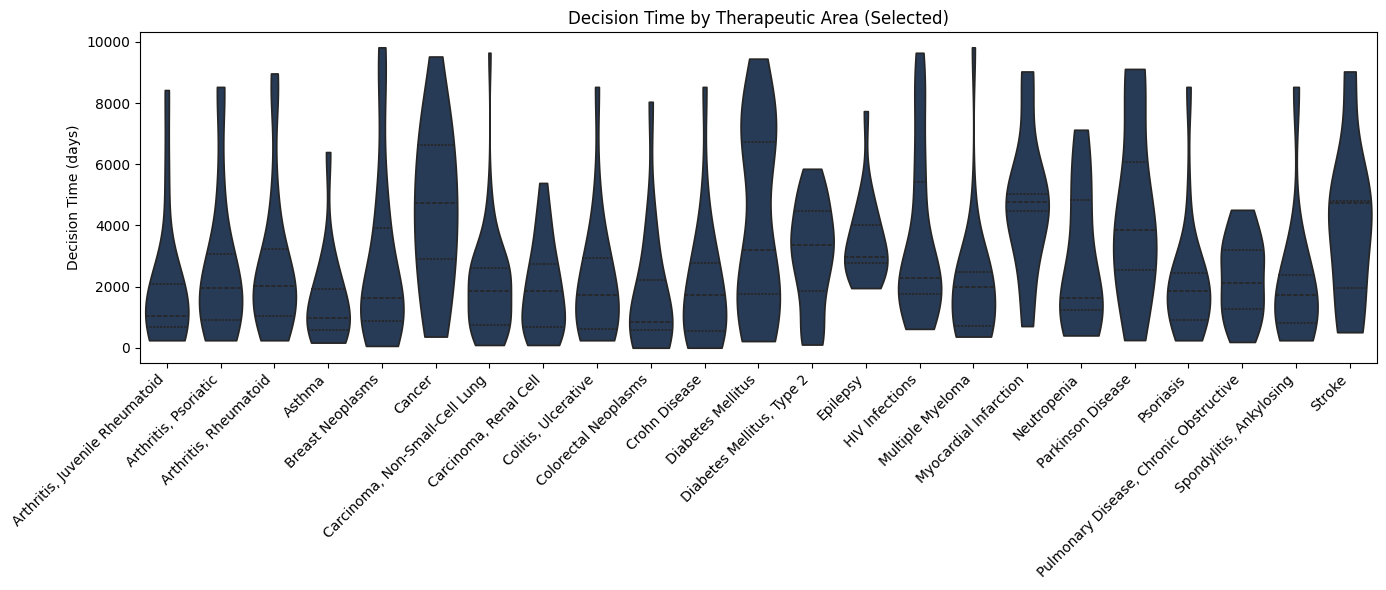

In [37]:
# therapeutic_area decision time distribution
thera_summary = []
thera_data_for_plot = []

for col in thera_cols:
    subset = data_human[data_human[col] == 1]
    if len(subset) >= 15:
        thera_summary.append({
            "therapeutic_area": col.replace("thera_", ""),
            "n": len(subset),
            "mean_days": subset["decision_time_days"].mean(),
            "median_days": subset["decision_time_days"].median()
        })
        # Add individual records with the therapeutic area label
        subset_copy = subset[['decision_time_days']].copy()
        subset_copy['therapeutic_area'] = col.replace("thera_", "")
        thera_data_for_plot.append(subset_copy)

thera_summary_df = pd.DataFrame(thera_summary)
thera_plot_df = pd.concat(thera_data_for_plot, ignore_index=True)

plt.figure(figsize=(14, 6))

sns.violinplot(
    data=thera_plot_df,
    x="therapeutic_area",
    y="decision_time_days",
    inner="quartile",
    cut=0,
    scale="width",
    color="#1f3a5f"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Decision Time (days)")
plt.title("Decision Time by Therapeutic Area (Selected)")
plt.tight_layout()
plt.show()

# **Unsupervised Analysis**

In [42]:
# Reserve only numerical features and drop decision_time_days for clustering
num_bool_features = data_human.select_dtypes(
    include=["int64", "float64", "bool"]
).columns

data_numeric = data_human[num_bool_features].copy()

bool_cols = data_numeric.select_dtypes(include=["bool"]).columns
data_numeric[bool_cols] = data_numeric[bool_cols].astype(int)

data_numeric = data_numeric.drop(['product_number', 'decision_time_days', 'revision_number'], axis=1)
data_numeric.head()

,patient_safety,additional_monitoring,generic,biosimilar,conditional_approval,exceptional_circumstances,accelerated_assessment,orphan_medicine,thera_Abdominal Neoplasms,thera_Achondroplasia,...,sub_voxelotor,sub_vutrisiran sodium,sub_yttrium (90y) chloride,sub_zanamivir,sub_zanubrutinib,sub_ziconotide,sub_zoledronic acid,sub_zoledronic acid monohydrate,"sub_zoledronic acid, zoledronic acid monohydrate",sub_zonisamide
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Hierarchical Clustering**

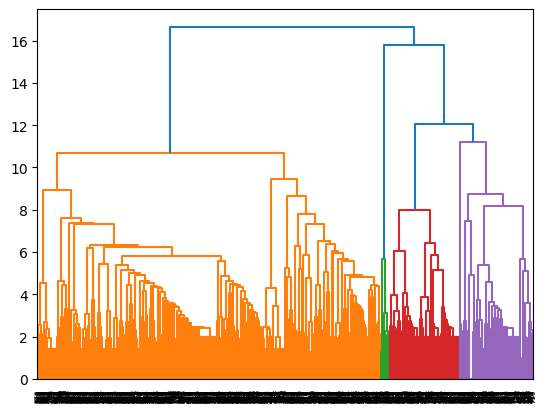

In [43]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

Z_ward = linkage(data_numeric, 'ward')
_ward = dendrogram(Z_ward,)

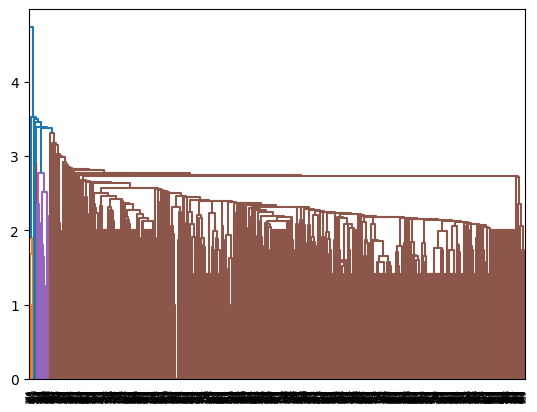

In [44]:
Z_average = linkage(data_numeric, 'average')
_average = dendrogram(Z_average,)

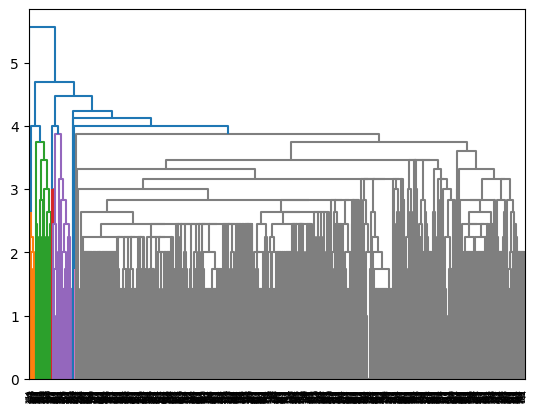

In [45]:
Z_complete = linkage(data_numeric, 'complete')
_complete = dendrogram(Z_complete,)

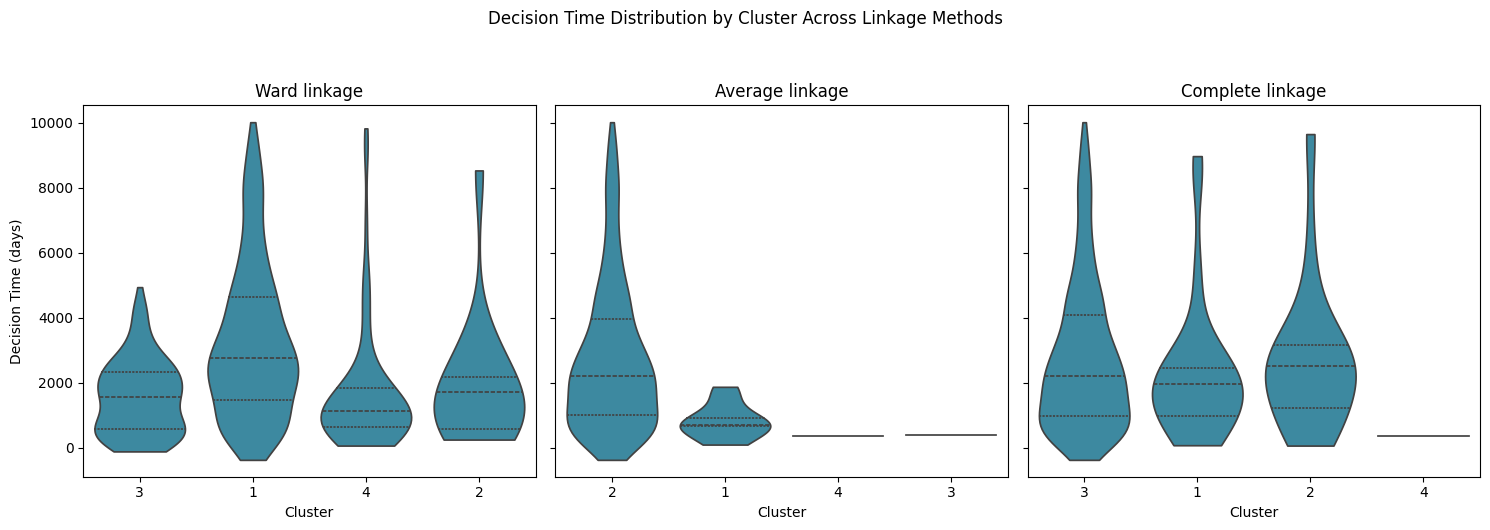

In [56]:
# clustering visualization
n_clusters = 4

data_plot = data_human.copy()

data_plot["cluster_ward"] = fcluster(
    Z_ward, n_clusters, criterion="maxclust"
).astype(str)

data_plot["cluster_average"] = fcluster(
    Z_average, n_clusters, criterion="maxclust"
).astype(str)

data_plot["cluster_complete"] = fcluster(
    Z_complete, n_clusters, criterion="maxclust"
).astype(str)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

linkages = [
    ("cluster_ward", "Ward linkage"),
    ("cluster_average", "Average linkage"),
    ("cluster_complete", "Complete linkage")
]

for ax, (col, title) in zip(axes, linkages):
    sns.violinplot(
        data=data_plot,
        x=col,
        y="decision_time_days",
        inner="quartile",
        cut=0,
        scale="width",
        color="#2c92b1",
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel("Cluster")

axes[0].set_ylabel("Decision Time (days)")

plt.suptitle(
    "Decision Time Distribution by Cluster Across Linkage Methods",
    y=1.05
)

plt.tight_layout()
plt.show()

In [70]:
# clustering results summary
data_hierarchical = data_human.copy()
n_clusters = 4
data_hierarchical['cluster_labels'] = fcluster(Z_ward, n_clusters, criterion='maxclust').astype(str)
cluster_summary = (
    data_hierarchical
    .groupby("cluster_labels")["decision_time_days"]
    .agg(["count", "mean", "median", "std"])
)

cluster_summary

,count,mean,median,std
cluster_labels,,,,
1,671,3279.105812,2755.0,2374.818304
2,17,1891.882353,1712.0,1967.488052
3,136,1570.463235,1548.0,1152.405400
4,145,1650.965517,1119.0,1851.166938


## **K-means**

In [ ]:
# import sys
# !{sys.executable} -m pip install yellowbrick

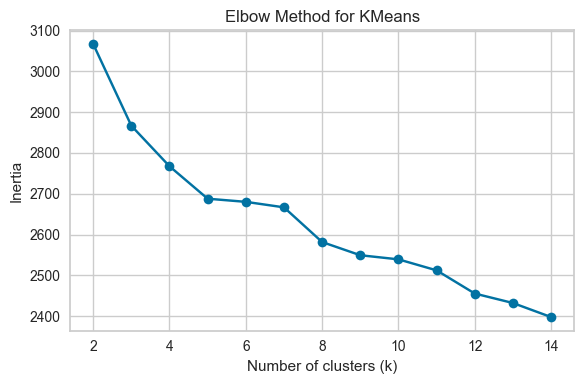

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = data_numeric

inertia = []
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.tight_layout()
plt.show()

你現在的資料是：

高維

大量 0/1

距離結構本來就不是 KMeans 的強項

👉 就算 Yellowbrick 能跑，它給你的 elbow 也未必有意義

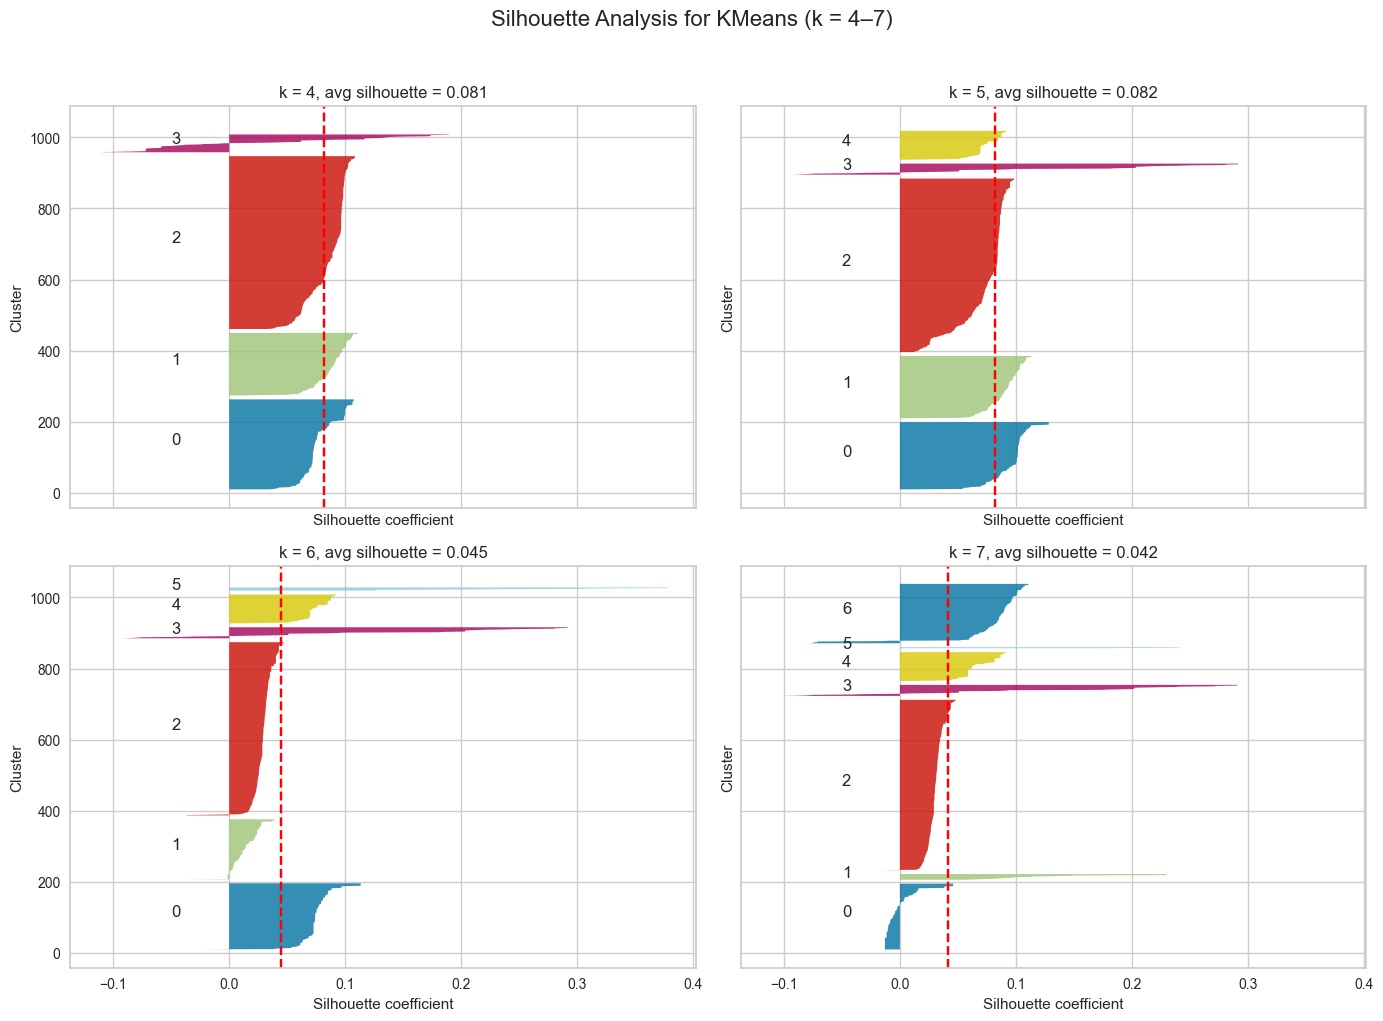

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

ks = [4, 5, 6, 7]

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, k in zip(axes, ks):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)

    sil_avg = silhouette_score(X, labels)
    sil_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(k):
        ith = sil_values[labels == i]
        ith.sort()
        size_i = ith.shape[0]
        y_upper = y_lower + size_i

        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith,
            alpha=0.8
        )
        ax.text(-0.05, y_lower + 0.5 * size_i, str(i))
        y_lower = y_upper + 10

    ax.axvline(sil_avg, linestyle="--", color="red")
    ax.set_title(f"k = {k}, avg silhouette = {sil_avg:.3f}")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

plt.suptitle("Silhouette Analysis for KMeans (k = 4–7)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

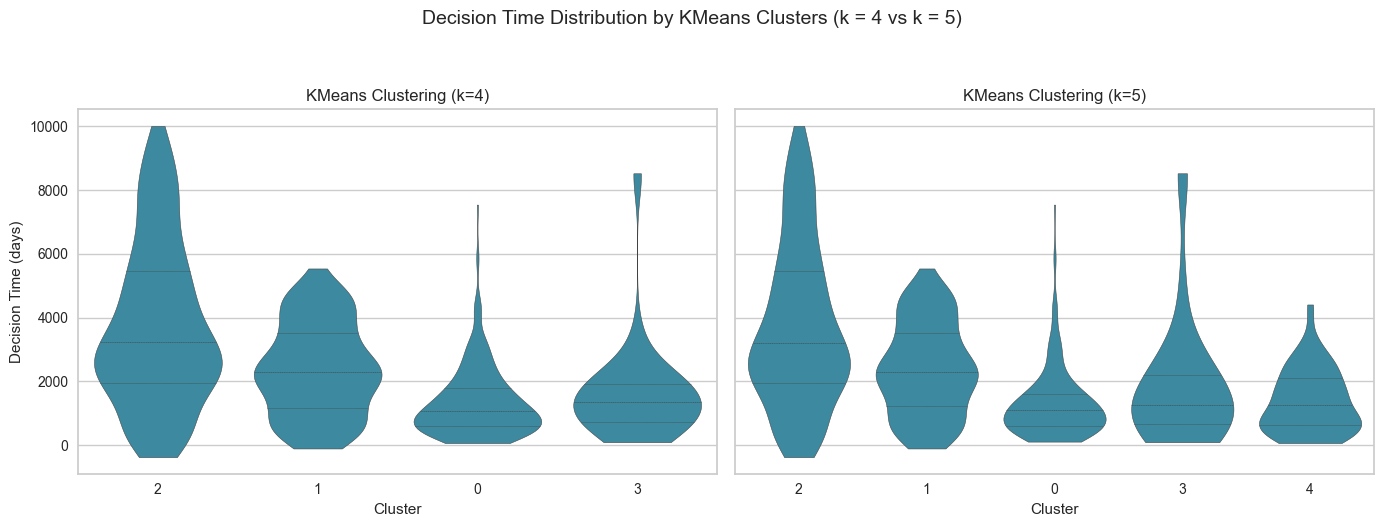

In [85]:
# clustering visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for ax, k in zip(axes, [4, 5]):
    # 1. Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_bool).astype(str)

    # 2. Attach labels to full data
    data_kmeans = data_human.copy()
    data_kmeans["cluster_labels"] = labels_kmeans

    # 3. Violin plot
    sns.violinplot(
        data=data_kmeans,
        x="cluster_labels",
        y="decision_time_days",
        inner="quartile",
        cut=0,
        scale="width",
        color="#2c92b1",
        ax=ax
    )

    ax.set_title(f"KMeans Clustering (k={k})")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Decision Time (days)")

plt.suptitle(
    "Decision Time Distribution by KMeans Clusters (k = 4 vs k = 5)",
    y=1.05,
    fontsize=14
)

plt.tight_layout()
plt.show()


In [91]:
# clustering results summary (k=4)
cluster_decision_summary = (
    data_kmeans
    .groupby("cluster_labels")["decision_time_days"]
    .agg(["count", "mean", "median", "std"])
)

print("Decision time summary by cluster (k=4):")
cluster_decision_summary

Decision time summary by cluster (k=4):


,count,mean,median,std
cluster_labels,,,,
0,190,1316.121053,1087.0,1108.183136
1,176,2397.250000,2292.5,1447.399072
2,489,3760.372188,3214.0,2554.202164
3,32,1904.125000,1245.5,2039.208223
4,82,1386.365854,1250.0,991.423413
